In [1]:
import pandas as pd
import phantomdragon.functions as ph
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats
import numpy as np

[5.68511919 5.61380194 6.09534005 5.56934124 7.05983536 9.00894107
 8.69170502 6.18663146 6.70339176 8.70985896 8.92897111 6.81874625
 8.20622971 8.26264449 6.86030824 7.6174645  7.66931044 5.42876234
 6.63566632 6.34971599 6.49691761 7.66031324 5.72834212 5.60102438
 4.75585431 6.99025807 6.06258945 6.72989422 6.69866985 6.83426263
 5.34882523 5.46293218 7.43148129 6.16541265 7.34613376 5.13246967
 5.95243555 4.79390863 7.99836076 6.35622927 6.29052115 8.03371711
 8.9639401  8.50232918 5.9077167  5.66007614 6.59747259 6.38473551
 6.813029   5.39567607 7.05518686 7.57842474 5.85311367 5.36475111
 6.27446151 5.2666046  5.91311118 9.0530802  9.32409503 6.74651743
 7.0175137  6.24855285 6.12087198 6.91680349 8.93062563 5.5386106
 5.53346053 7.49207204 8.87965718 5.82387375 7.2198282  4.75057437
 4.93722239 6.21047962 4.9817062  5.70035482 6.2931418  5.90454775
 6.11245327 8.144225   6.10088254 8.06717933 6.29952587 8.28024355
 6.11926611 7.2498405  5.46313287 7.28369842 6.59411758 7.99393

,PDB code,Binding Affinity Score,Binding Affinity True,mae,mse,r2,sd,r
136,1a30,5.685119,3.32,1.938301,5.981825,-3.722404,1.125473,0.00394
106,1bcu,5.613802,6.32,1.938301,5.981825,-3.722404,1.125473,0.00394
240,1bzc,6.095340,6.10,1.938301,5.981825,-3.722404,1.125473,0.00394
192,1c5z,5.569341,6.17,1.938301,5.981825,-3.722404,1.125473,0.00394
165,1e66,7.059835,3.28,1.938301,5.981825,-3.722404,1.125473,0.00394
...,...,...,...,...,...,...,...,...
264,5aba,5.951433,7.59,1.938301,5.981825,-3.722404,1.125473,0.00394
242,5c28,5.463616,7.41,1.938301,5.981825,-3.722404,1.125473,0.00394
125,5c2h,8.141677,4.76,1.938301,5.981825,-3.722404,1.125473,0.00394
67,5dwr,7.873927,6.00,1.938301,5.981825,-3.722404,1.125473,0.00394


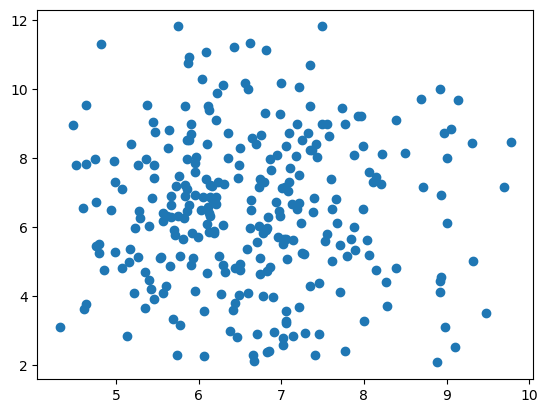

In [33]:
blub = ph.parameterCollector(add_information="final",modeltype="Lasso",scoretype="pKd pKi pIC50")
blub.set_datatype("ki")
a,b = blub.phantomscore(loadpath="../models/",features_test="../data/PDBbind_core_set_all_grail_scores.csv")
# print(a,b)
data = {"PDB code":a,"Binding Affinity Score":b}
df = pd.DataFrame(data)
df = df.sort_values("PDB code")

hlp = pd.read_csv("../data/PDBbind_core_set_all.csv")
hlp = hlp[["pKd pKi pIC50","PDB code"]]
hlp = hlp.sort_values("PDB code")

df["Binding Affinity True"] = hlp["pKd pKi pIC50"]

x = np.array(df["Binding Affinity Score"])
y = np.array(df["Binding Affinity True"])
plt.scatter(x,y)
print(x,y)

mae = mean_absolute_error(x,y)
mse = mean_squared_error(x,y)
r2 = r2_score(x,y)
sd = np.std(x)
r = round(stats.pearsonr(x, y).statistic, 6)
df["mae"] = mae
df["mse"] = mse
df["r2"] = r2
df["sd"] = sd
df["r"] = r

print(list(hlp["PDB code"]) == list(df["PDB code"]))

df

/home/cfellinger/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1504693420415606, tolerance: 0.7768461197569995
  model = cd_fast.enet_coordinate_descent_gram(
/home/cfellinger/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.1593829477974396, tolerance: 0.7768461197569995
  model = cd_fast.enet_coordinate_descent_gram(
/home/cfellinger/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.699019453710207, tolerance: 0.8133282579778248
  model = cd_fast.enet_coordinate_descent_gram(
/home/cfellinger/anaconda3/lib/python3.9/site-package

285 [5.71459156 5.16535385 8.92897111 7.0175137  5.5652777  6.62406023
 7.77307465 8.91790356 7.9939334  8.70985896 4.63262715 6.31958008
 6.69866985 7.38311918 7.70508441 8.10673739 5.46293218 6.11260334
 5.44447762 7.70956371 4.78852778 7.45293261 7.66931044 6.63043006
 7.0803229  7.34613376 9.13568164 4.63263976 5.26971964 7.8403496
 7.57842474 7.13391256 6.06258945 5.16258517 7.21629234 5.17609865
 7.28369842 5.64282573 6.35622927 6.42792035 7.88861153 6.10088254
 5.80827826 8.93062563 7.96328777 6.94436186 6.05324897 6.08293368
 7.26998776 7.0554376  6.78460102 6.43920925 5.60102438 7.87438545
 6.65521331 7.06227595 5.72834212 6.49781504 7.99836076 6.20378264
 4.48208231 7.05447421 5.66007614 6.48523177 5.39567607 5.74502563
 7.04440966 4.63293593 5.42876234 5.0779653  6.72989422 7.92916305
 6.30572678 7.21879731 6.13167728 9.77917982 6.59747259 6.78876991
 7.79092399 6.8256428  4.60766159 6.18663146 7.34186885 8.14167671
 7.00073352 6.81874625 5.53346053 5.97055192 7.25335495 7.0

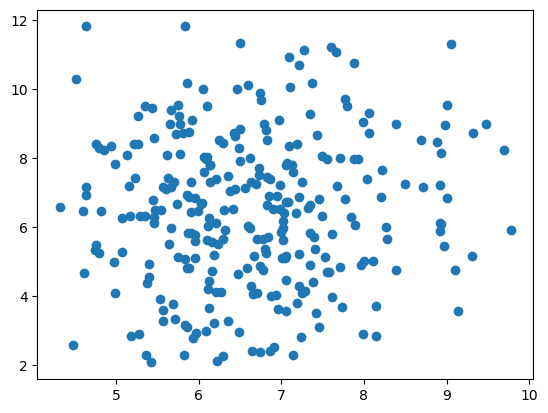

In [32]:
blub = ph.parameterCollector(add_information="final",modeltype="Lasso",scoretype="pKd pKi pIC50")
x_train,x_test,y_train,y_test = ph.prepare_data("pKd pKi pIC50","../data/PDBbind_refined_set_all_grail_scores.csv","../data/PDBbind_core_set_all_grail_scores.csv",f"../data/PDBbind_refined_set_ki.csv",f"../data/PDBbind_core_set_all.csv","final")
blub.set_trainingdata(x_train,y_train)
blub.set_testingdata(x_test,y_test)
blub.set_datatype("ki")
blub.train_and_save_model(savepath="../models/")
values = blub.phantomtest(loadpath="../models/",return_values=True)

blub.plot_phantomtest("../plots/")
modeltype,scoret,datatype,mae,mse,sd,pearsonr,confidence_interval,r_2,add_info = blub.get_stats()

print(len(values),values)
print(modeltype,scoret,datatype,mae,mse,sd,pearsonr,confidence_interval,r_2,add_info)

plt.scatter(values,y)

In [28]:
v = []
s = []

for i in df["Binding Affinity Score"]:
    hlp = round(i,12)
    s.append(hlp)
for j in values:
    hlp = round(j,12)
    v.append(hlp)

h=0

for i in v:
    print(i in s)
    if i in s:
        h += 1

print(h)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
